# ***Projet sur la taille des presidents des USA***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



data = pd.read_csv("/content/president_heights.csv")

data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


On voit bien que les hauteurs sont mesurées en centimètres(cm)

In [3]:
height = np.array(data["height(cm)"])
print(height)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


Maintenant que nous avons ce tableau de données, nous pouvons calculer une variété de statistiques récapitulatives:

In [4]:
print("Mean of heigths=", height.mean())
print("Standard Deviation of height=", height.std())
print("Minimum height=", height.min())
print("Maximum height=", height.max())

Mean of heigths= 179.73809523809524
Standard Deviation of height= 6.931843442745892
Minimum height= 163
Maximum height= 193


Notons que dans chaque cas, l'operation d'agrégation a reduit l'ensemble du tableau à une seule valeur de synthèse, ce qui nous donne des informations sur la distribution des valeurs. Nous pouvons également calculer des quantiles:

In [5]:
print("25th percentiles=", np.percentile(height, 25))
print("Median=", np.median(height))
print("75th percentiles=", np.percentile(height, 75))

25th percentiles= 174.25
Median= 182.0
75th percentiles= 183.0


Nous voyons que la hauteur médiane des présidents américains est de 182 cm, soit un peu moins de six pieds. Bien sûr, il est parfois plus utile de voir une réprésentation visuelle de ces données, ce que nous allons faire 

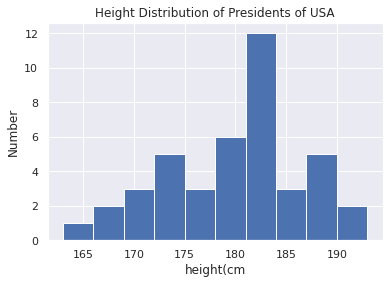

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.hist(height)
plt.title("Height Distribution of Presidents of USA")
plt.xlabel("height(cm")
plt.ylabel("Number")
plt.show()

# ***Analyse du Taux de natalité***  
On va analysé les naissance aux Etats-Units, fournies par les Centers for Disease Control(CDC).

In [12]:
import pandas as pd

births = pd.read_csv("/content/births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [13]:
births['day'].fillna(0, inplace=True)
births['day'] = births['day'].astype(int)

In [14]:
births['decade'] = 10*(births['year']//10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
births.head()

,year,month,day,gender,births,decade
0,1969,1,1,F,4046,1960
1,1969,1,1,M,4440,1960
2,1969,1,2,F,4454,1960
3,1969,1,2,M,4548,1960
4,1969,1,3,F,4548,1960


Nous constatons immédiatement ue les naissances masculines sont plus nombreuses que les naissances féminines chaque décennie. Pour voir cette tendance un peu plus clairement, nous pouvons utiliser les outils de visualisation

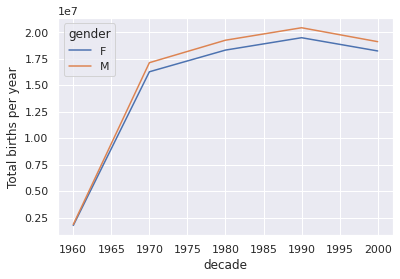

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

births_decade = births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')
births_decade.plot()
plt.ylabel('Total births per year')
plt.show()

***Exploration Supplémentaire des données***  
  
Il y'a quelques fonctionnalités intéressantes que nous pouvons extraire de cet ensemble de données.  
Nous devons commencer par nettoyer un peu les données, en supprimant les valeurs aberrantes causées par des dates mal saisies ou des valeurs manquantes.  
Un moyen simple de les supprimer tous à la fois est de couper les valeurs aberrantes, nous le ferons via une opération de découpage sigma robuste:  


In [16]:
import numpy as np
quartiles = np.percentile(births['births'], [25,50,75])
mu = quartiles[1]
sig = 0.74*(quartiles[2] - quartiles[0])

Cette dernière ligne est une estimation robuste de la moyenne de l'échantillon, où le 0.74 provient de l'intervalle interuartiles d'une distribution gaussienne. Avec cela, nous pouvons utiliser la méthode query() pour filtrer les lignes avec des naissances en dehors de ces valeurs:

In [22]:
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

En utilisant cela, nous pouvons tracer les naissances par jour de la semaine pendant plusieurs décennies:

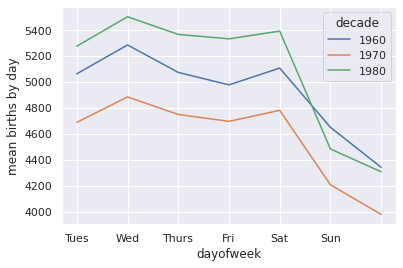

In [23]:
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');
plt.show()

Apparement, les naissances sont un peu moins fréquentes le week-end que les jours de la semaine !! À noter que les années 1990 et 2000 sont manquantes car les données du CDC ne contiennent que le mois de naissance commençant en 1989.  
   
Une autre vue intéressante consiste à tracer le nombre moyen de naissances par jour de l'année. Groupons d'abord les données par mois et par jour séparement

In [25]:
births_month = births.pivot_table('births', [births.index.month, births.index.day])

print(births_month.head())

births_month.index = [pd.datetime(2012, month, day) for (month, day) in births_month.index]
print(births_month.head())

       births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625
              births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


En nous concentrant uniquement sur le mois et le jour, nous disposons désormais d'une série chronologique reflétant le nombre moyen de naissances par date de l'année. À partir de là, nous pouvons utiliser la méthode de tracé pour tracer les données. Il révèle quelques tendances intéressantes 

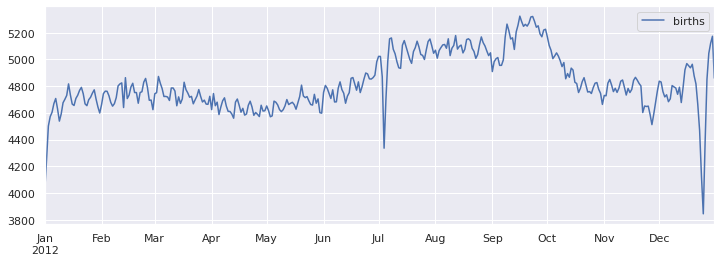

In [26]:
fig, ax = plt.subplots(figsize=(12,4))
births_month.plot(ax=ax)
plt.show()

# ***Time Série: Fremont Bridge Bicycle Counts***   

À titre d'exemple de travail avec des données de séries chronologiques, examinons le nombre de vélos sur Fremont Bridge à Seattle. Ces données proviennent d'un compteur de vélos automatisé, installé fin 2012, qui dispose de capteurs inductifs sur les trotoirs est et ouest du pont.  
   

Nous préciserons que nous voulons que la date soit en index, et nous voulons que  ces dates soient automatiquement analysées

In [32]:
import pandas as pd
data = pd.read_csv("/content/fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv", index_col= 'Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [34]:
'''data.columns = ["West", "East"]
data["Total"] = data["West"] + data["East"] 
data.head()'''

'data.columns = ["West", "East"]\ndata["Total"] = data["West"] + data["East"] \ndata.head()'

Jetons maintenant un oeil aux statistiques récapitulatives de ces données:

In [35]:
data.dropna().describe()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
count,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276
std,145.686289,67.739036,90.417584
min,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000
50%,62.000000,29.000000,30.000000
75%,150.000000,71.000000,74.000000
max,1097.000000,698.000000,850.000000


***Visualisation des données***  
   
Nous pouvons avoir un aperçu de l'ensemble de données en le visualisant.  
Commençons par tracer les données brutes:

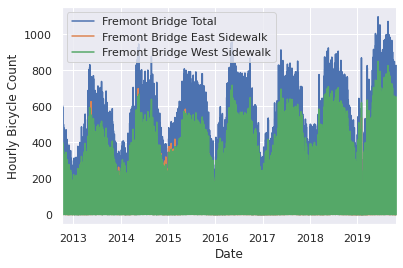

In [36]:
import matplotlib.pyplot as plt
import seaborn

seaborn.set()

data.plot()
plt.ylabel("Hourly Bicycle Count")
plt.show()

Les 25000 et quelques échantillons horaires sont beaucoup trop denses pour que nous puissions les comprendre. Nous pouvons obtenir plus d'informations en ré-échantillonnant les données dans une grille plus grossière.  
Ré-échantillonnons par semaine:

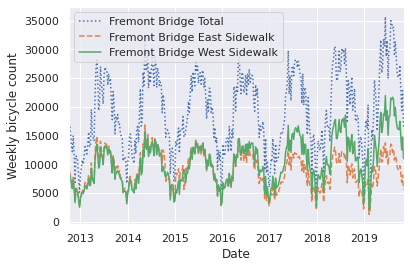

In [37]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

Cela nous montre quelques tendances saisonnières intéressantes: comme on peut s'y attendre, les gens font plus de vélo en été qu'en hiver, et même au cours d'une saison particulière, l'utilisation du vélo varie d'une semaine à l'autre.

Un autre moyen utile pour agréger les données consiste à utiliser une moyenne mobile, en utilisant la fonction pd.rolling_mean (). Ici, nous allons faire une moyenne mobile de 30 jours de nos données, en veillant à centrer la fenêtre:

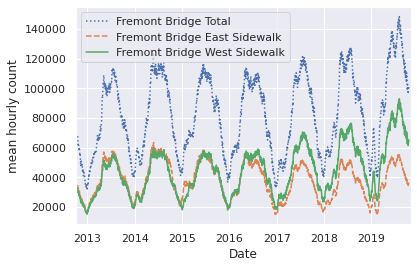

In [39]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

Le caractère irrégulier du résultat est dû à la coupure brutale de la fenêtre. Nous pouvons obtenir une version plus fluide d'une moyenne mobile en utilisant une fonction de fenêtre - par exemple, une fenêtre gaussienne.



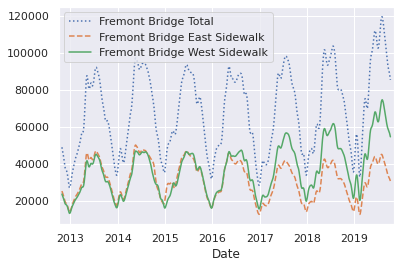

In [40]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

***Creuser dans les données***  
   
Bien que les vues de données lissées soient utiles pour se faire une idée de la tendance générale des données, elles masquent une grande partie de la structure intéressante. Par exemple, nous pourrions vouloir regarder le trafic moyen en fonction de l'heure de la journée. Nous pouvons le faire en utilisant la fonctionnalité GroupBy:

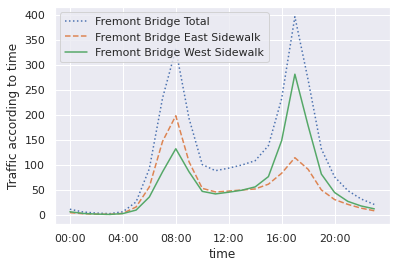

In [41]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()

# ***Sur la superficie et la population des villes californiennes***  
Dans ce projet, nous utiliserons la taille des points pour indiquer la zone et les populations des villes californiennes. Nous aimerions une légende qui spécifie l'échelle des tailles des points, et nous y parviendrons en traçant des données étiquetées sans entrées

In [1]:
import pandas as pd


cities = pd.read_csv('/content/california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [2]:
#  Extracting the data we are interested in 

latitude, longitude = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


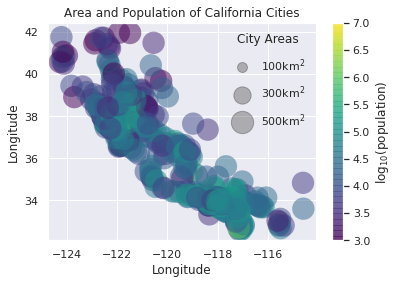

In [4]:
## to scatter the points, using size and color but without label
import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(longitude, latitude, label=None, c=np.log10(population),
            cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('Longitude')
plt.ylabel('Longitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
# now we will craete a legend, we will plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Areas')
plt.title("Area and Population of California Cities")
plt.show()